## Задача 1
Постройте график. Назовите график. Сделайте именование оси x и оси y. Сделайте выводы

#### 1.1. 
Скачать следующие данные: kc-house-data
#### 1.2. 
Изучите стоимости недвижимости
#### 1.3. 
Изучите распределение квадратуры жилой
#### 1.4. 
Изучите распределение года постройки


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1.1. Скачать следующие данные: kc-house-data

In [16]:
# Считать данные с помощью pandas
df = pd.read_csv("kc_house_data.csv", sep=',', encoding='windows-1251')
# Вывести на экран первые 5 строк
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


1.2. Изучите стоимости недвижимости

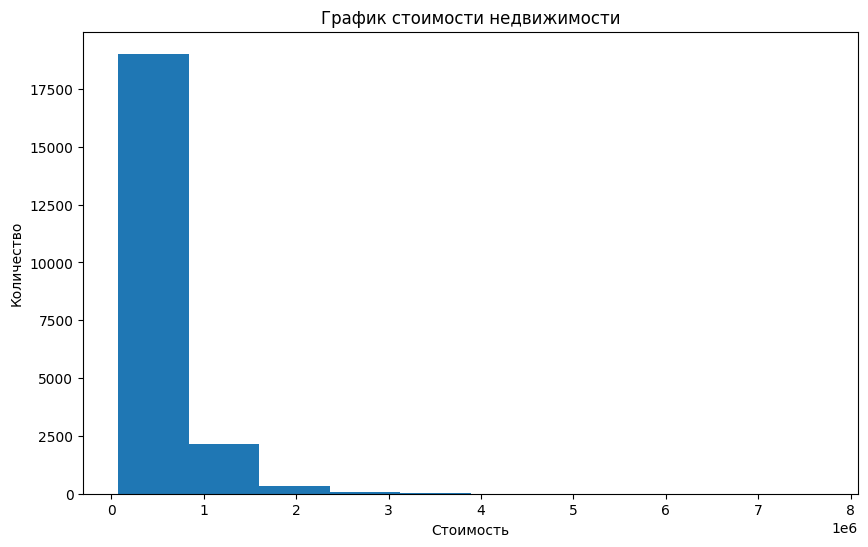

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
# рисование гистограммы (hist)
plt.hist(df['price'])
plt.title("График стоимости недвижимости")
plt.xlabel('Стоимость')
plt.ylabel('Количество');


Вывод: 

1.3. Изучите распределение квадратуры жилой

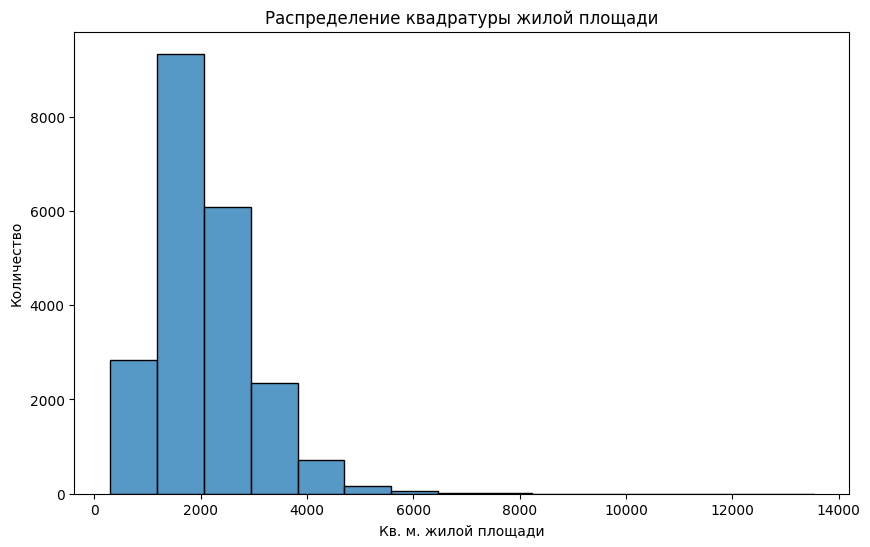

In [19]:
import seaborn as sns
plt.figure(figsize=(10,6))
# рисование гистограммы (histplot)
sns.histplot(df['sqft_living'], bins= 15)
plt.title("График  распределения квадратуры жилой площади")
plt.xlabel('Кв. м. жилой площади')
plt.ylabel('Количество');

1.4. Изучите распределение года постройки

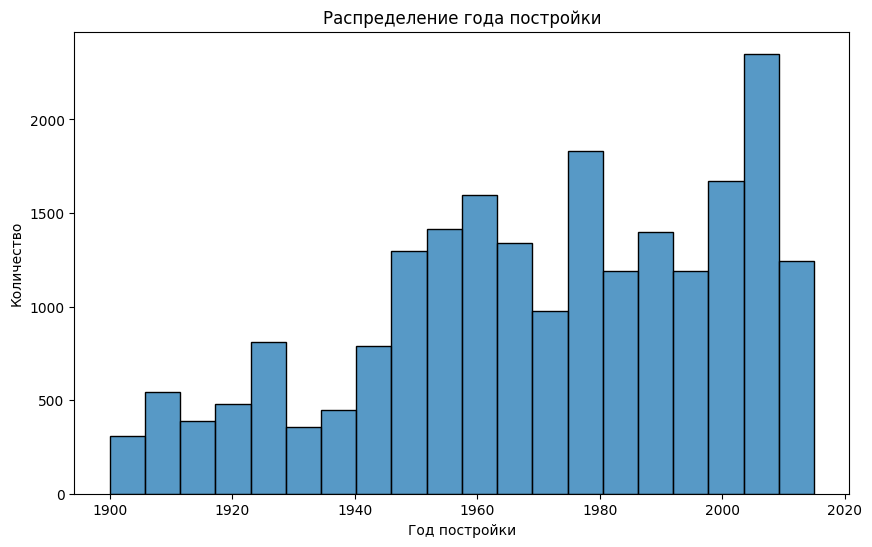

In [20]:
plt.figure(figsize=(10,6))
# рисование гистограммы (histplot)
sns.histplot(df['yr_built'], bins= 20)
plt.title("График  распределения года постройки")
plt.xlabel('Год постройки')
plt.ylabel('Количество');

## Задача 2
#### 2.1. 
Изучите распределение домов от наличия вида на набережную. Постройте график. Сделайте выводы
#### 2.2. 
Изучите распределение этажей домов
#### 2.3. 
Изучите распределение состояния домов



2.1. Изучите распределение домов от наличия вида на набережную. Постройте график. Сделайте выводы

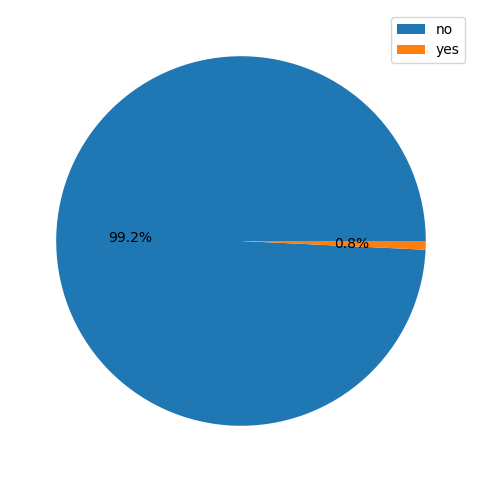

In [21]:
# создаем базу данных
data = df['waterfront'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(data, autopct='%1.1f%%')
plt.legend(['no', 'yes']);

2.2. Изучите распределение этажей домов

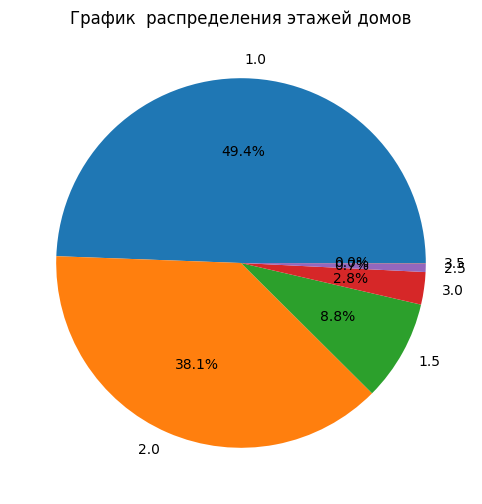

In [27]:
# создаем базу данных
data = df['floors'].value_counts()
plt.figure(figsize=(10, 6))
plt.title("График  распределения этажей домов")
plt.pie(data, autopct='%1.1f%%', labels=data.index);


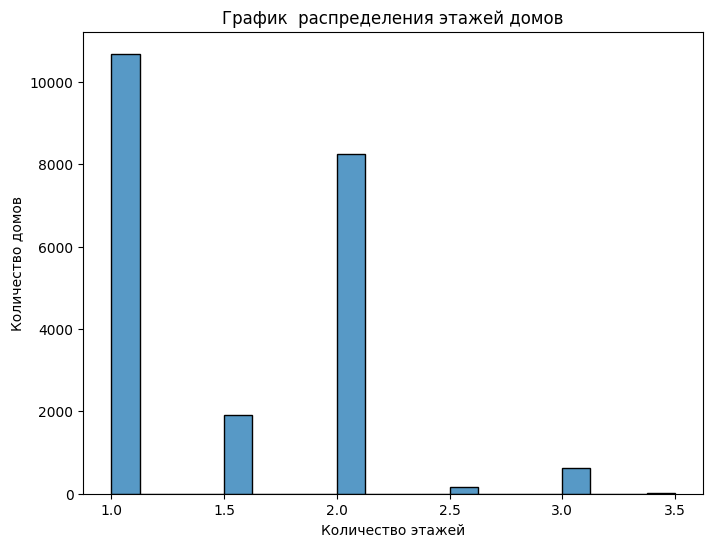

In [28]:
plt.figure(figsize=(8,6))
# рисование гистограммы (histplot)
sns.histplot(df['floors'], bins= 20)
plt.title("График  распределения этажей домов")
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов');

2.3. Изучите распределение состояния домов

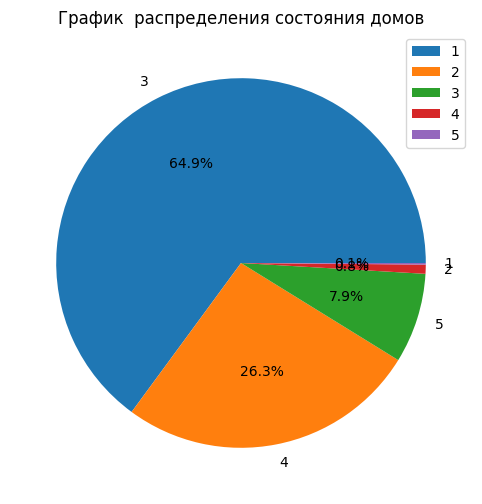

In [31]:
data = df['condition'].value_counts()
plt.figure(figsize=(10, 6))
plt.title("График  распределения состояния домов")
plt.pie(data, autopct='%1.1f%%', labels=data.index);
plt.legend(['1', '2','3','4','5']);

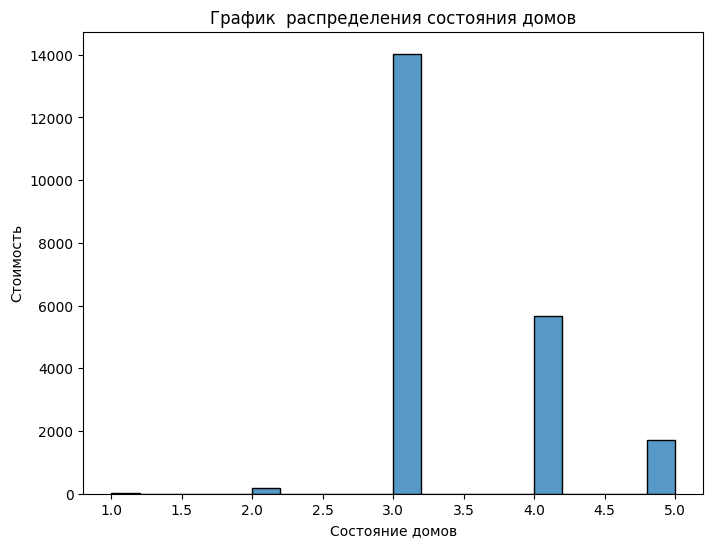

In [33]:
plt.figure(figsize=(8,6))
# рисование гистограммы (histplot)
sns.histplot(df['condition'], bins= 20)
plt.title("График  распределения состояния домов")
plt.xlabel('Состояние домов')
plt.ylabel('Стоимость');

## Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [35]:
# постороение корреляций по всему датасету методом .corr()
corr_matrix = df.corr(numeric_only=True)
# округлить до 1 знака после запятой
corr_matrix = np.round(corr_matrix, 1)
# "обрубим" маленькие корреляции
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


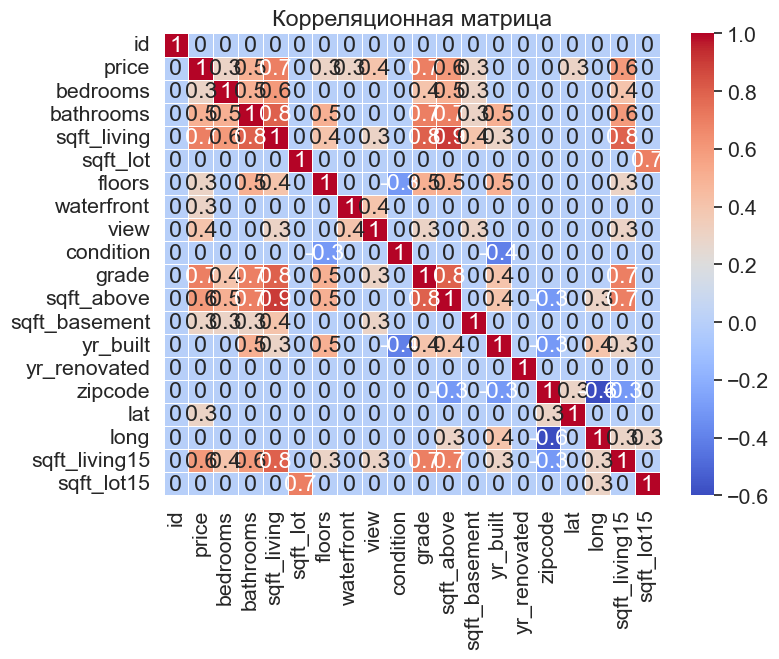

In [37]:
# построим тепловую карту
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Корреляционная матрица');

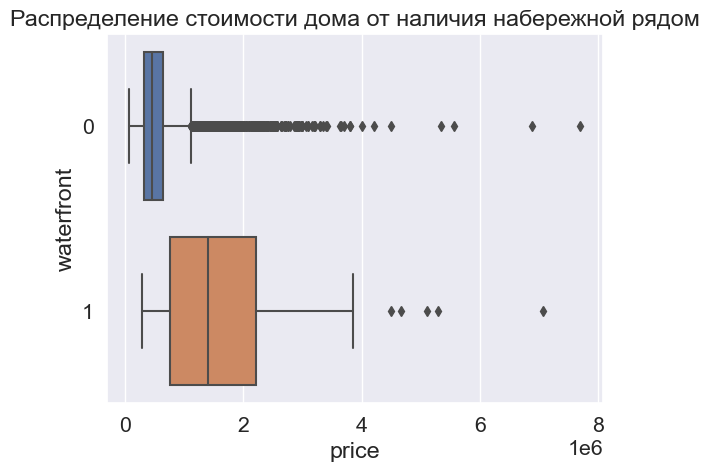

In [38]:
sns.boxplot(x=df['price'], y=df['waterfront'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('waterfront')
plt.title('Распределение стоимости дома от близости набережной');

Вывод: Наличие набережной влияет на стоимость дома. Она значительно выше.

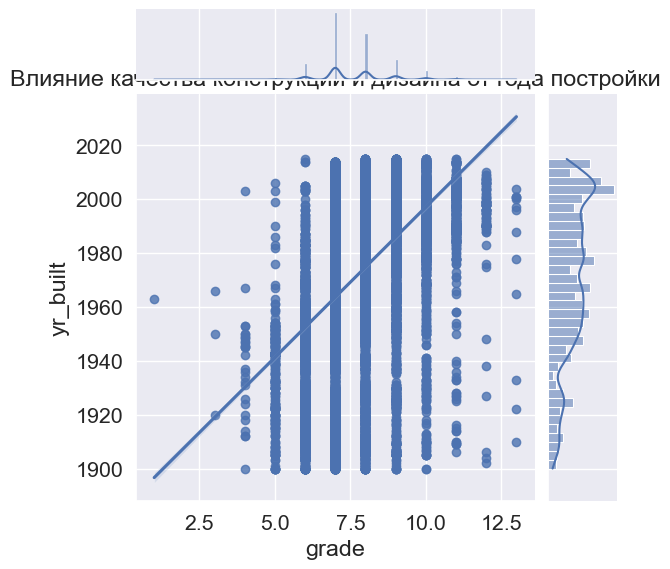

In [40]:

sns.jointplot(x=df['grade'], y=df['yr_built'], kind='reg')
plt.title('Влияние качества конструкций и дизайна от года постройки');

Вывод: Качество конструкций и дизайна улучшается с годами.

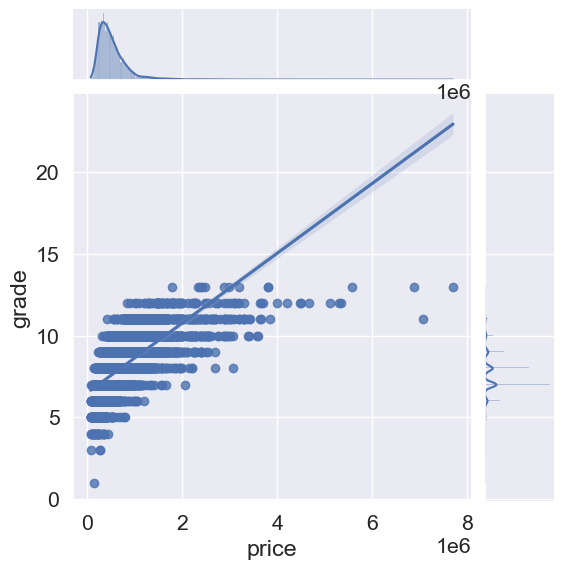

In [41]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg');

Вывод: Чем выше качество конструкции и дизайна дома, тем выше его стоимость

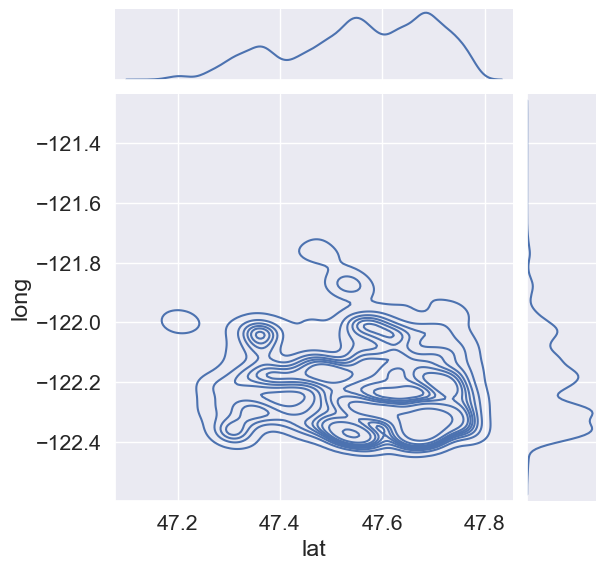

In [48]:
sns.jointplot(x=df['lat'], y=df['long'], kind='kde');

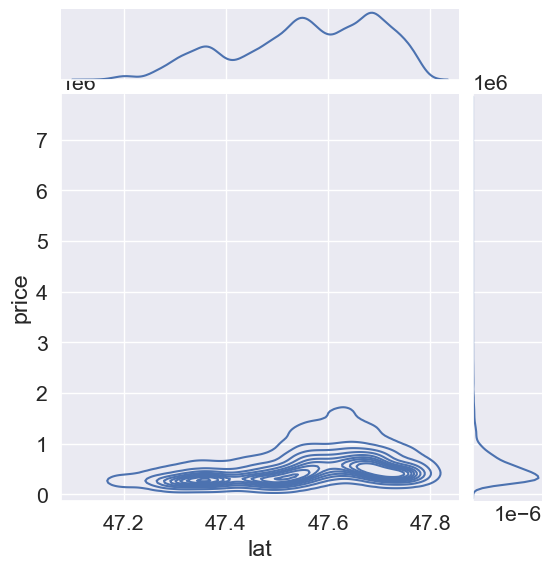

In [49]:
sns.jointplot(x=df['lat'], y=df['price'], kind='kde');

Вывод:видны три города. Можно посмотреть на зависимость по отдельности 

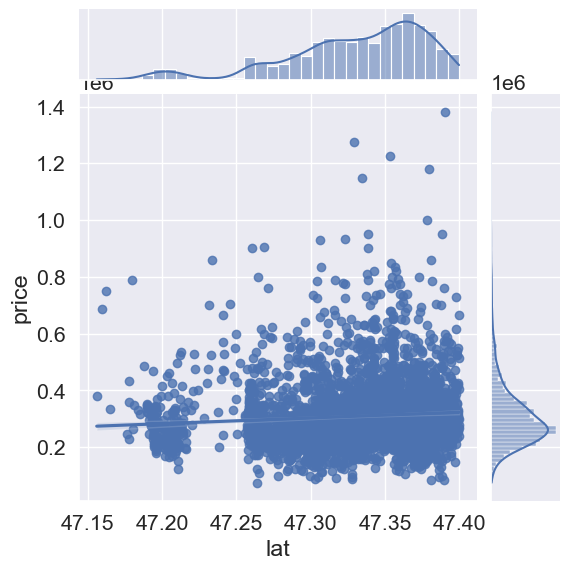

In [50]:
df_cut =df[df['lat'] < 47.4]
sns.jointplot(x = df_cut['lat'], y = df_cut['price'], kind='reg')

#### расшифровка
* id - Уникальный ID для каждого дома
* date - Дата продажи дома
* price - Стоимость продажи дома
* bedrooms - Кол-во спален
* bathrooms - Кол-во ванных комнат (0.5 - туалет без душа)
* sqft_living - Кв. метры жилые
* sqft_lot - Кв. метры общие
* floors - Кол-во этажей
* waterfront - Есть набержная или нет
* view - Значение от 0 до 4 насколько хороший вид
* condition - Значение от 1 до 5 насколько хорошее состояние
* grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна
* sqft_above - Кв. метры дома, которые находятся выше земли
* sqft_basement - Кв. метры дома, которые находятся ниже земли
* * yr_built - Год постройки дома
* yr_renovated - Год ремонта дома
* zipcode - Индекс